# Lesson 6 Assignment - Advertising Sales Regression

## Author - Yulia Zubova



### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market.
 2. 'radio': advertising dollars spent radio ads.
 3. 'newspaper': advertising dollars spent on newspaper ads.

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as sm
import seaborn as sns

from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [3]:
x1 = ad_data['TV']
x2 = ad_data['radio']
x3 = ad_data['newspaper']

## 1. Advertising dollars spent on TV

### Linear model for case if total sales depends on TV expenses only ###

In [4]:
sim_data_TV = ad_data[['TV', 'sales']] #dataset contains feature(TV) and label (sales)

In [5]:
# ols = ordinary least squares model
#Initialize model
ols_model_TV = sm.ols(formula = 'sales ~ TV', data=sim_data_TV)

#fit model to data
results_TV = ols_model_TV.fit()

# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results_TV.params.Intercept))
print('Slope : {0:.5f}'.format(results_TV.params.TV))

Intercept: 7.03259
Slope : 0.04754


We know intercept and slope, so it's easy to build graph ( y = m*x + b)

Text(0.5,1,'TV expenses vs Sales')

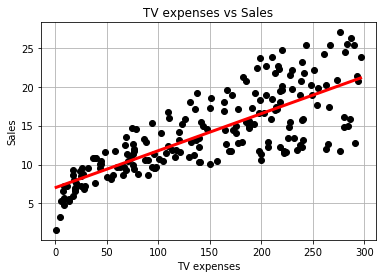

In [6]:
n_points = 200
x1 = np.linspace(sim_data_TV['TV'].min(), sim_data_TV['TV'].max(), n_points)
plt.plot(sim_data_TV['TV'], sim_data_TV['sales'], 'ko') #scatter plot TV expenses vs total sales
plt.plot(x1, results_TV.params.TV*x1 + results_TV.params.Intercept, linewidth=3 , color = 'red')  #show the best fit graph for TV
#expenses report
plt.grid(True)
plt.xlabel('TV expenses')
plt.ylabel('Sales')
plt.title('TV expenses vs Sales')

#### Getting parameters using sklearn####

Intercept: 7.03259
Slope : 0.04754


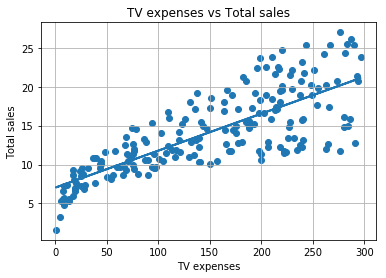

In [7]:
# First initialize the model.
linear_model_TV = linear_model.LinearRegression()

# Fit the model to the data
x_TV = sim_data_TV['TV'].values.reshape(n_points, 1) # the reshape is required by sklearn
y_TV = sim_data_TV['sales'].values.reshape(n_points, 1)
linear_model_TV.fit(x_TV, y_TV)

# Get predictions
y_TV_pred = linear_model_TV.predict(x_TV)

# Plot output
plt.scatter(x_TV, y_TV)
plt.plot(x_TV, y_TV_pred, linewidth=2)
plt.grid(True)
plt.xlabel('TV expenses')
plt.ylabel('Total sales')
plt.title('TV expenses vs Total sales')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model_TV.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model_TV.coef_[0][0]))

Both models show the same rresults.
Intercept = 7.03
Slope = 0.05

#### Parameter interpretation ####

**Intercept**:  When TV expenses == 0 , sales are 7.03
    
**Slope**:  When we increase TV expenses by 1 then we expect that sales will go up by 0.05.

## 2. Advertising dollars spent radio ads

### Linear model for case if total sales depends on radio expenses only ###

In [8]:
sim_data_radio = ad_data[['radio', 'sales']]  #dataset contains feature(radio) and label (sales)

In [9]:
# ols = ordinary least squares model
ols_model_radio = sm.ols(formula = 'sales ~ radio', data=sim_data_radio)

results_radio = ols_model_radio.fit()

# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results_radio.params.Intercept))
print('Slope : {0:.5f}'.format(results_radio.params.radio))

Intercept: 9.31164
Slope : 0.20250


Text(0.5,1,'Radio expenses vs Sales')

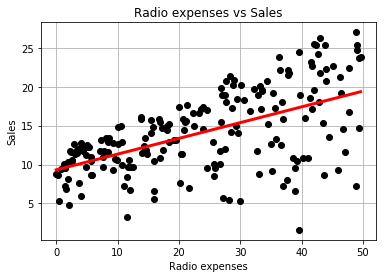

In [14]:
n_points = 200
x2 = np.linspace(sim_data_radio['radio'].min(), sim_data_radio['radio'].max(), n_points)
plt.plot(sim_data_radio['radio'], sim_data_radio['sales'], 'ko')
plt.plot(x2, results_radio.params.radio*x2 + results_radio.params.Intercept, linewidth=3 , color = 'red')
plt.grid(True)
plt.xlabel('Radio expenses')
plt.ylabel('Sales')
plt.title('Radio expenses vs Sales')

#### Getting parameters using sklearn ####

Intercept: 9.31164
Slope : 0.20250


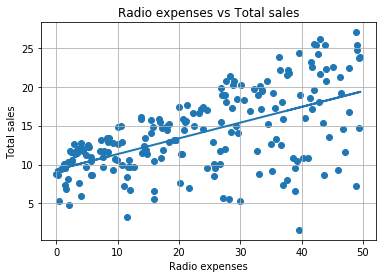

In [15]:
#Initialize the model.
linear_model_radio = linear_model.LinearRegression()

# Fit the model to the data
x_radio = sim_data_radio['radio'].values.reshape(n_points, 1) # the reshape is required by sklearn
y_radio = sim_data_radio['sales'].values.reshape(n_points, 1)
linear_model_radio.fit(x_radio, y_radio)

# Get predictions
y_radio_pred = linear_model_radio.predict(x_radio)

# Plot output
plt.scatter(x_radio, y_radio)
plt.plot(x_radio, y_radio_pred, linewidth=2)
plt.grid(True)
plt.xlabel('Radio expenses')
plt.ylabel('Total sales')
plt.title('Radio expenses vs Total sales')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model_radio.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model_radio.coef_[0][0]))

Both models show the same results.
Intercept = 9.31
Slope = 0.2

#### Parameter interpretation ####

**Intercept**:  When **radio** expenses == 0 , **sales** are 9.31.
    
**Slope**:  When we increase **radio** expenses by 1 then we expect that **sales** will go up by 0.2.

## 3. Advertising dollars spent on newspaper ads

### Linear model for case if total sales depends on newspaper expenses only ###

In [16]:
sim_data_newspaper = ad_data[['newspaper', 'sales']]   #dataset contains feature(newspaper) and label (sales)

In [17]:
# ols = ordinary least squares model
ols_model_newspaper = sm.ols(formula = 'sales ~ newspaper', data=sim_data_newspaper)

results_newspaper = ols_model_newspaper.fit()

# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results_newspaper.params.Intercept))
print('Slope : {0:.5f}'.format(results_newspaper.params.newspaper))

Intercept: 12.35141
Slope : 0.05469


Text(0.5,1,'Newspaper expenses vs Sales')

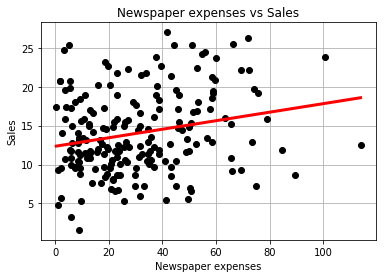

In [18]:
n_points = 200
x3 = np.linspace(sim_data_newspaper['newspaper'].min(), sim_data_newspaper['newspaper'].max(), n_points)
plt.plot(sim_data_newspaper['newspaper'], sim_data_newspaper['sales'], 'ko')
plt.plot(x3, results_newspaper.params.newspaper*x3 + results_newspaper.params.Intercept, linewidth=3 , color = 'red')
plt.grid(True)
plt.xlabel('Newspaper expenses')
plt.ylabel('Sales')
plt.title('Newspaper expenses vs Sales')

#### Getting parameters using sklearn ####

Intercept: 12.35141
Slope : 0.05469


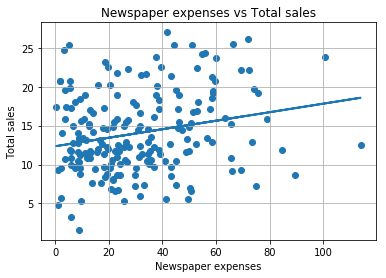

In [19]:
#Initialize the model.
linear_model_newspaper = linear_model.LinearRegression()

# Fit the model to the data
x_newspaper = sim_data_newspaper['newspaper'].values.reshape(n_points, 1) # the reshape is required by sklearn
y_newspaper = sim_data_newspaper['sales'].values.reshape(n_points, 1)
linear_model_newspaper.fit(x_newspaper, y_newspaper)

# Get predictions
y_newspaper_pred = linear_model_newspaper.predict(x_newspaper)

# Plot output
plt.scatter(x_newspaper, y_newspaper)
plt.plot(x_newspaper, y_newspaper_pred, linewidth=2)
plt.grid(True)
plt.xlabel('Newspaper expenses')
plt.ylabel('Total sales')
plt.title('Newspaper expenses vs Total sales')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model_newspaper.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model_newspaper.coef_[0][0]))

Both models show the same results.
Intercept = 12.35
Slope = 0.05

#### Parameter interpretation ####

**Intercept**:  When **newspaper** expenses == 0 , **sales** are 12.35
    
**Slope**:  When we increase **newspaper** expenses by 1 then we expect that sales will go up by 0.05.

## 4. All three features ##

In [20]:
sim_data = ad_data #copy of dataset, contains all features and label

In [21]:
# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std


In [22]:
#Priviously scale data (it's useful because now we have not the only feature)
sim_data['TV'] = scale(sim_data['TV'])
sim_data['radio'] = scale(sim_data['radio'])
sim_data['newspaper'] = scale(sim_data['newspaper'])
sim_data['sales'] = scale(sim_data['sales'])

In [23]:
# ols = ordinary least squares model
ols_model = sm.ols(formula = 'sales ~ TV + radio + newspaper', data=sim_data)

results = ols_model.fit()

#Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope TV : {0:.5f}'.format(results.params.TV))
print('Slope Radio : {0:.5f}'.format(results.params.radio))
print('Slope Newspaper : {0:.5f}'.format(results.params.newspaper))

Intercept: -0.00000
Slope TV : 0.75307
Slope Radio : 0.53648
Slope Newspaper : -0.00433



SSE, SST, SSR, and RMSE:
SSE: 179.44212763579029
SST: 199.99999999999986
SSR: 20.557872364209583
RMSE: 7.733953875299716
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 17 May 2018   Prob (F-statistic):           1.58e-96
Time:                        19:48:49   Log-Likelihood:                -56.280
No. Observations:                 200   AIC:                             120.6
Df Residuals:                     196   BIC:                             133.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------

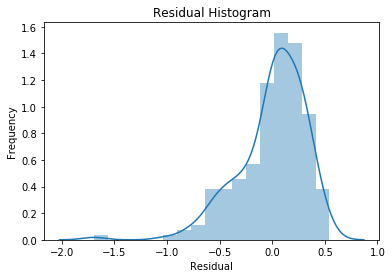

In [24]:
print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(sim_data['sales'])
sst = np.sum((sim_data['sales'] - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

#getting predicted valuesof sales
y_pred = ols_model.fit().predict(sim_data[['TV', 'radio', 'newspaper']])

### 1. Parameters interpretation ###

**Intercept**  - value of sales (zero) if all features are equal zero. 
**Slope TV** - When we increase TV expenses by 1 then we expect that sales will go up by 0.75 in case if newspaper and radio expenses are fixed.
**Slope radio** - When we increase radio expenses by 1 then we expect that sales will go up by 0.53 in case if newspaper and TV expenses are fixed.
**Slope newspaper** - When we increase newspaper expenses by 1 then we expect that sales will go down by 0.004 in case if TV and radio expenses are fixed.

Notes:
1. For newspaper expenses we've got p-value = 0.860, it's larger 0.05, and it means that feature "newspaper" isn't significantly important for dependent variable "sales".

### 2.  $R^2_{adj}$

$R^2$ is the fraction of the variance of the original data explained by the model. A model that perfectly explains the data has $R^2 = 1$. A model which does not explain the data at all has $R^2 = 0$

$R^2_{adj}$ also shows how well model describes data, but it has  an adjustment for the number of model parameters (there are 3 parameters in our example). 

$R^2$ = 0.897
$R^2_{adj}$ = 0.896

$R^2_{adj}$ is slidely less than $R^2$ but still close to 1 what shows good model fit.

### 3. Mean-squared error ###

Mean-squared error  it's the mean of Sum-squared-error (SSE).

This is a sum of a squared pointwise difference of the (SST - SSR) divided by number of datapoints. It's also a measurement of how much better we are explaining the variation than the mean.

$MSE$ = $1/n*\sum \left( \hat{Y_{i}} - \bar{Y} \right)^{2}$,
where

$\bar{Y}$ - The mean of the target values.


$\hat{Y_{i}}$ - Predicted value of the i-th point.

$n$ - number of datapoints.



In [32]:
mse = np.sum((y_pred - mean_y)**2)/n_points
print(mse)

0.8972106381789531


The same value as in summary statistics.

## SUMMARY##

In this Assignment:

1. Were built separate linear models for features 'TV', 'radio' and 'newspaper',
were built graphs of fitted line and points,
weere interpreted parameters Intercept and Slope.

2. Were built multiple linear model including all three feature,
were interpreted parameters,
was interpreted the adjusted R-squared.
was found the mean-squared error.